In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os

//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
//anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.set_random_seed(777)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [17]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 3000

In [18]:
import pandas as pd
from sklearn import preprocessing 
stock = pd.read_csv('Google.csv')

In [31]:
stock = pd.read_csv('Google.csv')
stock.Date = pd.to_datetime(stock.Date)
Features = ['Open','High','Low','Close','Volume']
data = {'Date':stock['Date'],'Open':stock['Adj. Open'], 'High':stock['Adj. High'], 'Low':stock['Adj. Low'], 'Close':stock['Adj. Close'], 'Volume':stock['Adj. Volume']}
Stock = pd.DataFrame(data, columns = ['Date','Open','High','Low','Close','Volume'])
new_x = np.array(Stock[Features])[:-1,] # 맨 마지막 데이터는 제거
x_data = preprocessing.scale(new_x)[::-1]
new_y = np.array(Stock['Close'])[:-1]
y_data = preprocessing.scale(new_y)[::-1]
# y_data = np.roll(Stock['Close'][:].tolist(),-1)[:-1] # 다음날 종가로 데이터 한칸씩 땡기기

In [32]:
y_data = y_data.reshape(3124,1)

In [33]:
x_data.shape

(3124, 5)

In [34]:
y_data.shape

(3124, 1)

In [39]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y_data) - seq_length):
    _x = x_data[i:i + seq_length]
    _y = y_data[i + seq_length] # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[ 2.44166803  2.42977487  2.47081406  2.44355605 -0.85152793]
 [ 2.42823679  2.40800983  2.42686568  2.43632386 -0.84045253]
 [ 2.41921428  2.40556317  2.42924127  2.4380165  -0.8507646 ]
 [ 2.42152117  2.40306555  2.43786569  2.41826901 -0.86503669]
 [ 2.41793267  2.40826469  2.43001592  2.42427019 -0.83368755]
 [ 2.35959392  2.40077181  2.37775298  2.41416563 -0.76487524]
 [ 2.32119697  2.32319244  2.34893606  2.35164046 -0.84402129]] -> [2.32471206]
[[ 2.42823679  2.40800983  2.42686568  2.43632386 -0.84045253]
 [ 2.41921428  2.40556317  2.42924127  2.4380165  -0.8507646 ]
 [ 2.42152117  2.40306555  2.43786569  2.41826901 -0.86503669]
 [ 2.41793267  2.40826469  2.43001592  2.42427019 -0.83368755]
 [ 2.35959392  2.40077181  2.37775298  2.41416563 -0.76487524]
 [ 2.32119697  2.32319244  2.34893606  2.35164046 -0.84402129]
 [ 2.33344913  2.32161231  2.33958863  2.32471206 -0.82287302]] -> [2.32368621]
[[ 2.41921428  2.40556317  2.42924127  2.4380165  -0.8507646 ]
 [ 2.42152117  2.4030

In [41]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [42]:
# input place holder
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [43]:
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:,-1], output_dim, activation_fn=None)

In [44]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y)) # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [45]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 3386.6123046875
[step: 1] loss: 2532.477783203125
[step: 2] loss: 1785.025390625
[step: 3] loss: 1217.33154296875
[step: 4] loss: 823.5729370117188
[step: 5] loss: 561.5405883789062
[step: 6] loss: 394.94073486328125
[step: 7] loss: 299.8245544433594
[step: 8] loss: 258.8428955078125
[step: 9] loss: 256.2372741699219
[step: 10] loss: 275.9239807128906
[step: 11] loss: 302.6010437011719
[step: 12] loss: 324.42218017578125
[step: 13] loss: 334.60906982421875
[step: 14] loss: 331.0467529296875
[step: 15] loss: 314.8714599609375
[step: 16] loss: 289.05157470703125
[step: 17] loss: 257.2962646484375
[step: 18] loss: 223.30003356933594
[step: 19] loss: 190.27197265625
[step: 20] loss: 160.718505859375
[step: 21] loss: 136.4178466796875
[step: 22] loss: 118.46157836914062
[step: 23] loss: 107.27992248535156
[step: 24] loss: 102.6150894165039
[step: 25] loss: 103.39656066894531
[step: 26] loss: 107.54573822021484
[step: 27] loss: 112.00048828125
[step: 28] loss: 113.36340332031

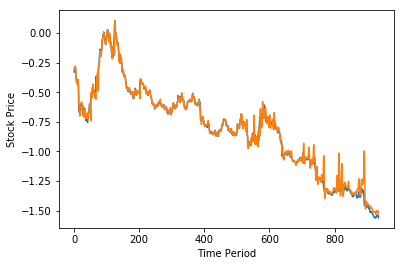

In [46]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    # plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()
        